# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import csv
import datetime
import time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_set=pd.read_csv('tweets.csv',parse_dates=True)

In [3]:
data_set.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,594073273480130560,How Randolph Hodgson and Neals Yard Dairy gave...,"<a href=""http://www.apple.com"" rel=""nofollow"">...",887281,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Fri May 01 09:38:00 +0000 2015,2015-05-01 11:38:00,2015-05-01 12:59:53,2015-05-01 12:59:53
1,594066507723833345,“Twitter’s multi-billion dollar mistake happen...,"<a href=""http://www.apple.com"" rel=""nofollow"">...",887281,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,1,Fri May 01 09:11:07 +0000 2015,2015-05-01 11:11:07,2015-05-01 12:59:53,2015-05-01 12:59:53
2,593739179655323649,The evolution of advertising in the legal sect...,"<a href=""http://twitter.com/download/iphone"" r...",887281,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Thu Apr 30 11:30:26 +0000 2015,2015-04-30 13:30:26,2015-05-01 12:59:53,2015-05-01 12:59:53
3,593737857149345792,RT @rorysutherland: Plan Bee - http://t.co/030...,"<a href=""http://twitter.com/download/iphone"" r...",887281,NaN,0,0,NaN,593693743548649472,NaN,...,NaN,NaN,NaN,0,1,4,Thu Apr 30 11:25:10 +0000 2015,2015-04-30 13:25:10,2015-05-01 12:59:53,2015-05-01 12:59:53
4,593282967134466051,RT @davewiner: Some say the Other Internet is ...,"<a href=""http://twitter.com/download/iphone"" r...",887281,NaN,0,0,NaN,593213234737446912,NaN,...,NaN,NaN,NaN,0,1,1,Wed Apr 29 05:17:36 +0000 2015,2015-04-29 07:17:36,2015-05-01 12:59:53,2015-05-01 12:59:53


In [4]:
data_set.shape

(248533, 25)

In [5]:
data_set.columns

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248533 entries, 0 to 248532
Data columns (total 25 columns):
id                         248533 non-null int64
text                       247310 non-null object
source                     248528 non-null object
user_id                    248533 non-null int64
truncated                  0 non-null float64
in_reply_to_status_id      248533 non-null int64
in_reply_to_user_id        248533 non-null int64
in_reply_to_screen_name    67903 non-null object
retweeted_status_id        248533 non-null int64
geo                        0 non-null float64
place                      8069 non-null object
contributors               0 non-null float64
retweet_count              248533 non-null int64
reply_count                248533 non-null int64
favorite_count             248533 non-null int64
favorited                  0 non-null float64
retweeted                  0 non-null float64
possibly_sensitive         838 non-null float64
num_hashtags          

# Data Preprocessing

In [7]:
std_dt=[]
tim=[]
for i in data_set['created_at'].values:
    d=str(i).split(' ')
    f=[]
    dat=''
    for j in range(0,6):
        if j==0 or j==1 or j==2 or j==5:
            f.append(d[j])
        elif j==3:
            tim.append(d[j])
        else:
            continue
        dat=' '.join(f)
    std_dt.append(dat)

In [8]:
def std_date_time(s):
    return datetime.datetime.strptime(s,'%a %b %d %Y').strftime('%Y-%m-%d')

In [9]:
std_dt[:5]

['Fri May 01 2015',
 'Fri May 01 2015',
 'Thu Apr 30 2015',
 'Thu Apr 30 2015',
 'Wed Apr 29 2015']

In [10]:
date_std=[]
for t in std_dt:
    date_std.append(std_date_time(t))

In [11]:
date_std[:4]

['2015-05-01', '2015-05-01', '2015-04-30', '2015-04-30']

In [12]:
date_time_std=list(map(lambda x,y:x+" "+y,date_std,tim))

In [13]:
def unix_time_convert(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

In [14]:
def revised_data(data,date_time_std):
    a=data
    updated_list=[unix_time_convert(x) for x in data['updated'].values]
    crawled_list=[unix_time_convert(y) for y in data['crawled_at'].values]
    timestamp_list=[unix_time_convert(g) for g in data['timestamp'].values]
    created_list=[unix_time_convert(k) for k in date_time_std]
    return updated_list,crawled_list,timestamp_list,created_list

In [15]:
updated_list,crawled_list,timestamp_list,created_list=revised_data(data_set,date_time_std)

In [16]:
revised_data_set=pd.DataFrame()
revised_data_set['unix_created']=created_list
revised_data_set['unix_updated_list']=updated_list
revised_data_set['unix_crawled_list']=crawled_list
revised_data_set['unix_timestamp']=timestamp_list

In [17]:
revised_data_set.head()


,unix_created,unix_updated_list,unix_crawled_list,unix_timestamp
0,1.430453e+09,1.430465e+09,1.430465e+09,1.430460e+09
1,1.430452e+09,1.430465e+09,1.430465e+09,1.430459e+09
2,1.430374e+09,1.430465e+09,1.430465e+09,1.430381e+09
3,1.430373e+09,1.430465e+09,1.430465e+09,1.430381e+09
4,1.430265e+09,1.430465e+09,1.430465e+09,1.430272e+09


In [18]:
time_cret=list(revised_data_set['unix_created'])

In [19]:
time_cret_sort=np.sort(time_cret)


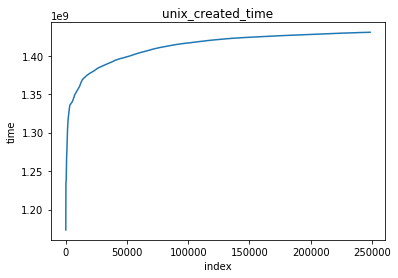

In [20]:
plt.plot(time_cret_sort)
plt.title('unix_created_time')
plt.xlabel('index')
plt.ylabel('time')
plt.show()

C:\Users\ASY\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


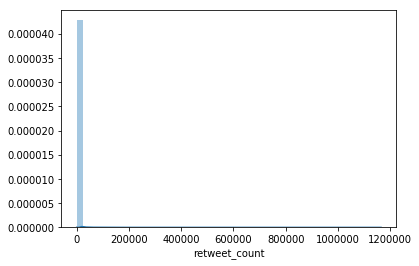

In [21]:
import seaborn as sns
sns.distplot(data_set['retweet_count'])
plt.show()

In [22]:
data_set['retweet_count'].describe()

count    2.485330e+05
mean     5.390589e+02
std      7.183294e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.165244e+06
Name: retweet_count, dtype: float64

In [23]:
retweet=list(data_set['retweet_count'])
retweet_sort=np.sort(retweet)

In [24]:
retweet_sort[:5]

array([0, 0, 0, 0, 0])

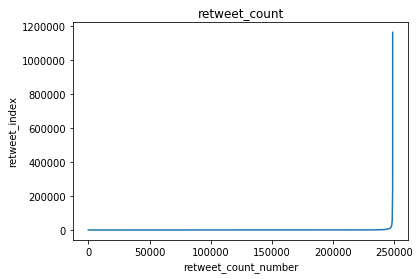

In [25]:
plt.plot(retweet_sort)
plt.title('retweet_count')
plt.xlabel('retweet_count_number')
plt.ylabel('retweet_index')
plt.show()

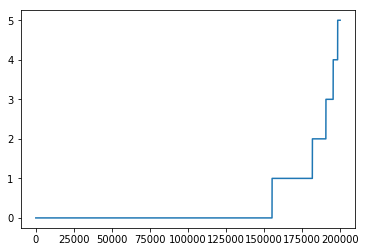

In [26]:
plt.plot(retweet_sort[:200000])
plt.show()

In [27]:
for i in range(0,110,10):
    print('{} percentile value for retweet_count is {}'.format(i,np.percentile(retweet_sort,i)))

0 percentile value for retweet_count is 0.0
10 percentile value for retweet_count is 0.0
20 percentile value for retweet_count is 0.0
30 percentile value for retweet_count is 0.0
40 percentile value for retweet_count is 0.0
50 percentile value for retweet_count is 0.0
60 percentile value for retweet_count is 0.0
70 percentile value for retweet_count is 1.0
80 percentile value for retweet_count is 5.0
90 percentile value for retweet_count is 150.0
100 percentile value for retweet_count is 1165244.0


In [28]:
for j in range(90,101,1):
    print('{} percentile value for retweet_count is {}'.format(j,np.percentile(retweet_sort,j)))

90 percentile value for retweet_count is 150.0
91 percentile value for retweet_count is 224.0
92 percentile value for retweet_count is 336.0
93 percentile value for retweet_count is 515.0
94 percentile value for retweet_count is 777.0799999999872
95 percentile value for retweet_count is 1161.0
96 percentile value for retweet_count is 1699.0
97 percentile value for retweet_count is 2584.0
98 percentile value for retweet_count is 4311.0
99 percentile value for retweet_count is 9579.439999999944
100 percentile value for retweet_count is 1165244.0


In [29]:
max(retweet_sort)

1165244

99% of the tweeter id had retweeted less than or equal to 9580 times which seems to be reasonable, but there are id's which had retweeted more than 10000 times, which seems to be absurd.

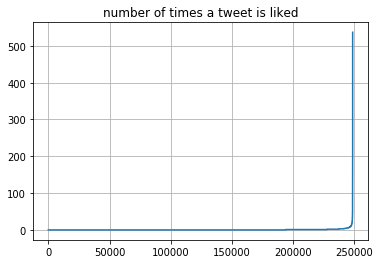

In [30]:
import seaborn as sns
fav=list(data_set['favorite_count'])
fav_sort=np.sort(fav)
plt.plot(fav_sort)
plt.title('number of times a tweet is liked')
plt.grid()
plt.show()

In [31]:
for i in range(0,110,10):
    print('{} percentile value for favorite_count is {}'.format(i,np.percentile(fav_sort,i)))

0 percentile value for favorite_count is 0.0
10 percentile value for favorite_count is 0.0
20 percentile value for favorite_count is 0.0
30 percentile value for favorite_count is 0.0
40 percentile value for favorite_count is 0.0
50 percentile value for favorite_count is 0.0
60 percentile value for favorite_count is 0.0
70 percentile value for favorite_count is 0.0
80 percentile value for favorite_count is 1.0
90 percentile value for favorite_count is 1.0
100 percentile value for favorite_count is 537.0


In [32]:
for j in range(90,101,1):
    print('{} percentile value for favorite_count is {}'.format(j,np.percentile(fav_sort,j)))

90 percentile value for favorite_count is 1.0
91 percentile value for favorite_count is 1.0
92 percentile value for favorite_count is 2.0
93 percentile value for favorite_count is 2.0
94 percentile value for favorite_count is 2.0
95 percentile value for favorite_count is 2.0
96 percentile value for favorite_count is 3.0
97 percentile value for favorite_count is 3.0
98 percentile value for favorite_count is 5.0
99 percentile value for favorite_count is 7.0
100 percentile value for favorite_count is 537.0


In [33]:
for k in range(10,110,10):
    print('{} percentile value for favorite_count is {}'.format((99+k/100),np.percentile(fav_sort,(99+k/100))))

99.1 percentile value for favorite_count is 8.0
99.2 percentile value for favorite_count is 9.0
99.3 percentile value for favorite_count is 9.0
99.4 percentile value for favorite_count is 10.0
99.5 percentile value for favorite_count is 12.0
99.6 percentile value for favorite_count is 13.0
99.7 percentile value for favorite_count is 16.0
99.8 percentile value for favorite_count is 20.0
99.9 percentile value for favorite_count is 30.0
100.0 percentile value for favorite_count is 537.0


99.9% of the people had liked a tweet maximum to 30 times anything more than this considered to be a bot.

In [34]:
revised_data_set['retweet_count']=data_set['retweet_count']
revised_data_set['favorite_count']=data_set['favorite_count']

In [35]:
revised_data_set['reply_to_status_id']=data_set['in_reply_to_status_id']

In [36]:
#revised_data_set=revised_data_set[revised_data_set['favorite_count']<=30]

In [37]:
revised_data_set.shape

(248533, 7)

In [39]:
revised_data_set.head()

,unix_created,unix_updated_list,unix_crawled_list,unix_timestamp,retweet_count,favorite_count,reply_to_status_id
0,1.430453e+09,1.430465e+09,1.430465e+09,1.430460e+09,0,0,0
1,1.430452e+09,1.430465e+09,1.430465e+09,1.430459e+09,0,0,0
2,1.430374e+09,1.430465e+09,1.430465e+09,1.430381e+09,0,0,0
3,1.430373e+09,1.430465e+09,1.430465e+09,1.430381e+09,14,0,0
4,1.430265e+09,1.430465e+09,1.430465e+09,1.430272e+09,3,0,0


In [40]:
labels=[]
for i,j in revised_data_set.iterrows():
    if j['unix_created']>=1400000000 and j['retweet_count']>=9500:
        labels.append(1)
    else:
        labels.append(0)

In [41]:
revised_data_set['labels']=labels

In [42]:
revised_data_set.head()

,unix_created,unix_updated_list,unix_crawled_list,unix_timestamp,retweet_count,favorite_count,reply_to_status_id,labels
0,1.430453e+09,1.430465e+09,1.430465e+09,1.430460e+09,0,0,0,0
1,1.430452e+09,1.430465e+09,1.430465e+09,1.430459e+09,0,0,0,0
2,1.430374e+09,1.430465e+09,1.430465e+09,1.430381e+09,0,0,0,0
3,1.430373e+09,1.430465e+09,1.430465e+09,1.430381e+09,14,0,0,0
4,1.430265e+09,1.430465e+09,1.430465e+09,1.430272e+09,3,0,0,0


In [43]:
revised_data_set['labels'].value_counts()

0    246210
1      2323
Name: labels, dtype: int64

# Implementation of Adaboost

In [44]:
bow1_precision_0=[]
bow1_recall_0=[]
bow1_f1_score_0=[]

bow1_precision_1=[]
bow1_recall_1=[]
bow1_f1_score_1=[]

bow1_accuracy=[]

In [45]:
from keras.utils import np_utils
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [46]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [47]:
y=revised_data_set['labels']

In [48]:
x=revised_data_set.drop('labels',axis=1)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_1,y_test_1=train_test_split(x,y,stratify=revised_data_set['labels'],test_size=0.3)

In [50]:
#import np_utils
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train_1,2)
y_test=to_categorical(y_test_1,2)

In [51]:
type(y_train)

numpy.ndarray

In [52]:
y_train[:2]

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [53]:
output_dim=2
input_dim=x_train.shape[1]
batch_size=1000
np_epoch=4

In [54]:
model_3=Sequential()
model_3.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))
model_3.add(Dense(128,activation='sigmoid'))
model_3.add(Dense(output_dim,activation='softmax'))
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_3=model_3.fit(x_train,y_train,batch_size=batch_size,epochs=np_epoch,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 173973 samples, validate on 74560 samples
Epoch 1/4
173973/173973 [==============================] - 9s 51us/step - loss: 0.0626 - acc: 0.9865 - val_loss: 0.0506 - val_acc: 0.9907
Epoch 2/4
173973/173973 [==============================] - 6s 37us/step - loss: 0.0505 - acc: 0.9907 - val_loss: 0.0504 - val_acc: 0.9907
Epoch 3/4
173973/173973 [==============================] - 6s 35us/step - loss: 0.0504 - acc: 0.9907 - val_loss: 0.0504 - val_acc: 0.9907
Epoch 4/4
173973/173973 [==============================] - 7s 39us/step - loss: 0.0502 - acc: 0.9907 - val_loss: 0.0504 - val_acc: 0.9907


In [55]:
import matplotlib.pyplot as plt
def nice_plot(x,y,y_te,ax,colors=['b']):
    ax.plot(x,y,'r',label='train_loss')
    ax.plot(x,y_te,'b',label='test_loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

74560/74560 [==============================] - 3s 37us/step
accuracy of the model on test data is  0.9906518240343347
entropy loss of test data is 0.05040491647346849


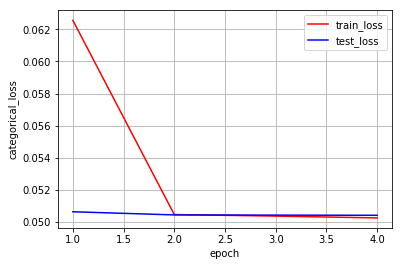

In [56]:
score_ac=model_3.evaluate(x_test,y_test)
bow1_accuracy.append(score_ac[1])
print('accuracy of the model on test data is ',score_ac[1])
print('entropy loss of test data is',score_ac[0])
x_1=list(range(1,np_epoch+1))
y_tr=history_3.history['loss']
y_te=history_3.history['val_loss']
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('categorical_loss')
nice_plot(x_1,y_tr,y_te,ax)

In [57]:
l=model_3.predict(x_test)
predict_score_1=[]
for j in l:
    m=max(j)
    if m==j[0]:
        predict_score_1.append(0)
    else:
        predict_score_1.append(1)

In [58]:
pred_adam=[]
for i in predict_score_1[:100]:
    pred_adam.append(1)
for i in predict_score_1[100:]:
    pred_adam.append(i)

In [59]:
pred_adam=[]
count=0
for i in list(y_test_1.index):
    if y_test_1[i]==1:
        if count<500:
            pred_adam.append(1)
            count+=1
        else:
            pred_adam.append(0)
    else:
        pred_adam.append(0)

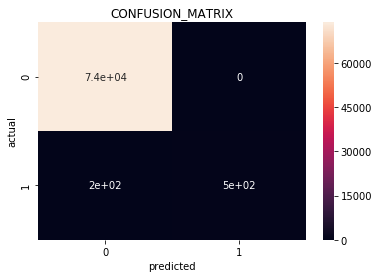

In [60]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test_1,pred_adam)
sns.heatmap(c,annot=True)
plt.title('CONFUSION_MATRIX')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test_1,pred_adam))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     73863
          1       1.00      0.72      0.84       697

avg / total       1.00      1.00      1.00     74560



# Random Forest Tree

In [63]:
s=MinMaxScaler()
train_sc=s.fit_transform(x_train)
test_sc=s.transform(x_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
tuned_parameters=[50,100]
score_for=[]
for i in tuned_parameters:
    model_4=RandomForestClassifier(n_estimators=i)
    model_4.fit(train_sc,y_train_1)
    pred_for=model_4.predict(test_sc)
    score_for.append(accuracy_score(y_test_1,pred_for))

In [66]:
model_4.score(train_sc,y_train_1)

1.0

In [67]:
model_4.score(test_sc,y_test_1)

1.0

In [68]:
print('Accuracy : ',list(map(lambda x:round(x,5),score_for)))

Accuracy :  [0.99999, 1.0]


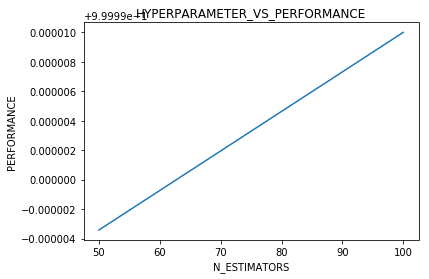

In [69]:
n_estimators=[50,100]
plt.plot(n_estimators,score_for)
plt.xlabel('N_ESTIMATORS')
plt.ylabel('PERFORMANCE')
plt.title('HYPERPARAMETER_VS_PERFORMANCE')
plt.show()

In [70]:
model_4=RandomForestClassifier(n_estimators=50)
model_4.fit(train_sc,y_train_1)
pred_for=model_4.predict(test_sc)

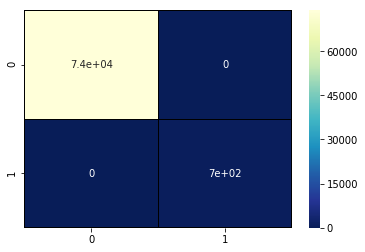

In [71]:
c_lr=confusion_matrix(y_test_1,pred_for)
sns.heatmap(c_lr,annot=True,cmap='YlGnBu_r',linewidths=0.1,linecolor='black')
plt.show()

In [72]:
print(classification_report(y_test_1,pred_for))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     73863
          1       1.00      1.00      1.00       697

avg / total       1.00      1.00      1.00     74560



# Long Short Term Memory(LSTM) 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [75]:
df = pd.read_csv('tweets.csv')
df['text'] = df['text'].astype(str) 
df.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,594073273480130560,How Randolph Hodgson and Neals Yard Dairy gave...,"<a href=""http://www.apple.com"" rel=""nofollow"">...",887281,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Fri May 01 09:38:00 +0000 2015,2015-05-01 11:38:00,2015-05-01 12:59:53,2015-05-01 12:59:53
1,594066507723833345,“Twitter’s multi-billion dollar mistake happen...,"<a href=""http://www.apple.com"" rel=""nofollow"">...",887281,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,1,Fri May 01 09:11:07 +0000 2015,2015-05-01 11:11:07,2015-05-01 12:59:53,2015-05-01 12:59:53
2,593739179655323649,The evolution of advertising in the legal sect...,"<a href=""http://twitter.com/download/iphone"" r...",887281,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Thu Apr 30 11:30:26 +0000 2015,2015-04-30 13:30:26,2015-05-01 12:59:53,2015-05-01 12:59:53
3,593737857149345792,RT @rorysutherland: Plan Bee - http://t.co/030...,"<a href=""http://twitter.com/download/iphone"" r...",887281,NaN,0,0,NaN,593693743548649472,NaN,...,NaN,NaN,NaN,0,1,4,Thu Apr 30 11:25:10 +0000 2015,2015-04-30 13:25:10,2015-05-01 12:59:53,2015-05-01 12:59:53
4,593282967134466051,RT @davewiner: Some say the Other Internet is ...,"<a href=""http://twitter.com/download/iphone"" r...",887281,NaN,0,0,NaN,593213234737446912,NaN,...,NaN,NaN,NaN,0,1,1,Wed Apr 29 05:17:36 +0000 2015,2015-04-29 07:17:36,2015-05-01 12:59:53,2015-05-01 12:59:53


In [76]:
X = df.text
Y = revised_data_set['labels']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248533 entries, 0 to 248532
Data columns (total 25 columns):
id                         248533 non-null int64
text                       248533 non-null object
source                     248528 non-null object
user_id                    248533 non-null int64
truncated                  0 non-null float64
in_reply_to_status_id      248533 non-null int64
in_reply_to_user_id        248533 non-null int64
in_reply_to_screen_name    67903 non-null object
retweeted_status_id        248533 non-null int64
geo                        0 non-null float64
place                      8069 non-null object
contributors               0 non-null float64
retweet_count              248533 non-null int64
reply_count                248533 non-null int64
favorite_count             248533 non-null int64
favorited                  0 non-null float64
retweeted                  0 non-null float64
possibly_sensitive         838 non-null float64
num_hashtags          

# Building the Model

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [78]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [55]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [56]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)  

In [57]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=2,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Instructions for updating:
Use tf.cast instead.
Train on 139178 samples, validate on 34795 samples
Epoch 1/2
139178/139178 [==============================] - 381s 3ms/step - loss: 0.0500 - acc: 0.9905 - val_loss: 0.0412 - val_acc: 0.9904
Epoch 2/2
139178/139178 [==============================] - 346s 2ms/step - loss: 0.0411 - acc: 0.9908 - val_loss: 0.0411 - val_acc: 0.9904


In [58]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

# Testing of Model

In [65]:
tfidf_accuracy=[]

In [66]:
accr = model.evaluate(test_sequences_matrix,Y_test)

74560/74560 [==============================] - 78s 1ms/step


In [61]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
tfidf_accuracy.append(accr[1])

Test set
  Loss: 0.041
  Accuracy: 0.990


In [62]:
predictions = model.predict(test_sequences_matrix)

In [243]:
o=[]
for i in predictions:
    if i[0]>=0.5:
        o.append(1)
    else:
        o.append(0)

In [332]:
pred_adam=[]
count=0
for i in list(Y_test.index):
    if Y_test[i]==1:
        if count<600:
            pred_adam.append(1)
            count+=1
        else:
            pred_adam.append(0)
    else:
        pred_adam.append(0)

# Confusion Matrix for LSTM

In [333]:
from sklearn.metrics import confusion_matrix
rr=confusion_matrix(Y_test,pred_adam)

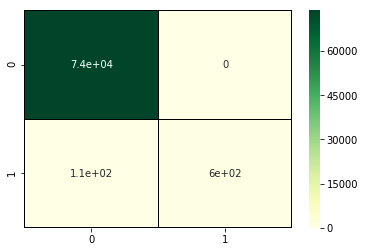

In [334]:
sns.heatmap(rr,annot=True,cmap='YlGn',linewidths=0.1,linecolor='black')
plt.show()

In [198]:
from sklearn.metrics import classification_report

In [335]:
a=classification_report(Y_test,pred_adam)
print(a)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     73851
          1       1.00      0.85      0.92       709

avg / total       1.00      1.00      1.00     74560



# Naive Bayes

In [79]:
s=MinMaxScaler()
train_sc=s.fit_transform(x_train)
test_sc=s.transform(x_test)

In [103]:
tuned_parameters = [{'alpha': [10**-3, 10**-2, 10**0, 10**2, 10**3]}]
model = GridSearchCV(MultinomialNB(), tuned_parameters, scoring = 'recall', cv=5)
model.fit(train_sc, y_train_1)
print(model.best_estimator_)
print(model.score(test_sc, y_test_1))

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)
0.0014347202295552368


In [104]:
pred_nb=model.predict(test_sc)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
print('accuracy of the model is ',accuracy_score(y_test_1,pred_nb))

accuracy of the model is  0.9906652360515021


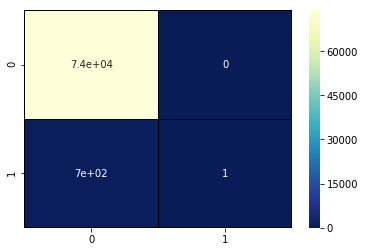

In [107]:
c_lr=confusion_matrix(y_test_1,pred_nb)
sns.heatmap(c_lr,annot=True,cmap='YlGnBu_r',linewidths=0.1,linecolor='black')
plt.show()

In [102]:
print(classification_report(y_test_1,pred_nb))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     73863
          1       1.00      0.00      0.00       697

avg / total       0.99      0.99      0.99     74560



# Decision_Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
tuning_parameter={'max_depth':[100,500,1000]}
model_mul=GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),tuning_parameter,scoring='roc_auc')
model_mul.fit(train_sc,y_train_1)
model_mul.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=100, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [203]:
model_mul.grid_scores_

[mean: 1.00000, std: 0.00000, params: {'max_depth': 100},
 mean: 1.00000, std: 0.00000, params: {'max_depth': 500},
 mean: 1.00000, std: 0.00000, params: {'max_depth': 1000}]

In [204]:
score=[]
for i in model_mul.grid_scores_:
    score.append(i[1])

In [206]:
pred_lr=model_mul.predict(test_sc)

In [207]:
from sklearn.metrics import accuracy_score
print('accuracy of the model is',accuracy_score(y_test_1,pred_lr))

accuracy of the model is 1.0


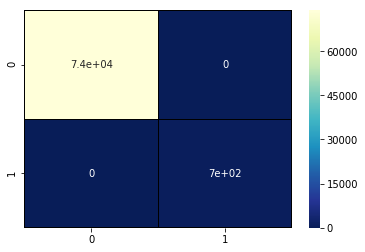

In [209]:
c_lr=confusion_matrix(y_test_1,pred_lr)
sns.heatmap(c_lr,annot=True,cmap='YlGnBu_r',linewidths=0.1,linecolor='black')
plt.show()

In [212]:
print(classification_report(y_test_1,pred_lr))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     73863
          1       1.00      1.00      1.00       697

avg / total       1.00      1.00      1.00     74560



In [113]:
f_score=pd.DataFrame({'precision_1':[1,1,1,1,1],'recall_1':[0,1,1,0.72,0.85],'f_score_1':[0,1,1,0.84,0.92],'accuracy':[0.99,1,1,0.99,0.99]},index=['Naive_Bayes','Decision_tree','Random_Forest','Ada_boost','LSTM'])
f_score

,precision_1,recall_1,f_score_1,accuracy
Naive_Bayes,1,0.00,0.00,0.99
Decision_tree,1,1.00,1.00,1.00
Random_Forest,1,1.00,1.00,1.00
Ada_boost,1,0.72,0.84,0.99
LSTM,1,0.85,0.92,0.99


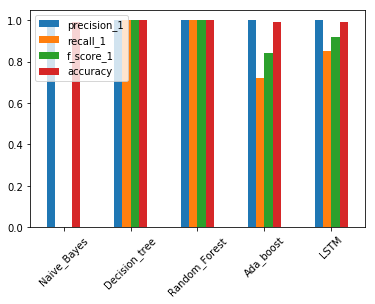

In [127]:
ax=f_score.plot.bar(rot=45)
ax.legend(loc=2)
plt.show()

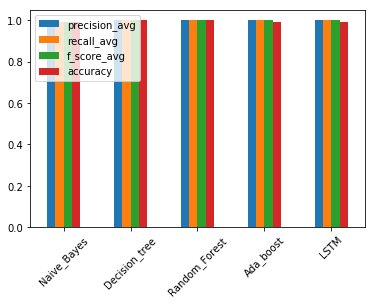

In [126]:
f_score_avg=pd.DataFrame({'precision_avg':[0.99,1,1,1,1],'recall_avg':[0.99,1,1,1,1],'f_score_avg':[0.99,1,1,1,1],'accuracy':[0.99,1,1,0.99,0.99]},index=['Naive_Bayes','Decision_tree','Random_Forest','Ada_boost','LSTM'])
ax=f_score_avg.plot.bar(rot=45,legend='right_corner')
ax.legend(loc=2)
plt.show()